In [60]:
import pandas as pd
import numpy as np

In [61]:
# read csv and look at first 20 rows
df = pd.read_csv('diabetes.csv')
df.head(20)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
15            7      100              0              0        0  30.0   
16            0      118             84             47      230  45.8   
17            7      107             74              0        0  29.6   
18            1      103             30             38       83  43.3   
19            1      115             70             30       96  34.6   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1

In [62]:
# generate descriptive statistics 
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

<AxesSubplot:xlabel='BMI', ylabel='SkinThickness'>

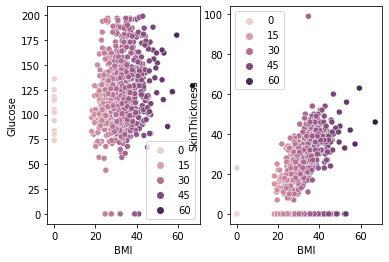

In [63]:
# Data Visualiztaion for the uncleaned dataset to see outliers in the columns 
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2)
sns.scatterplot(data=df, x="BMI", y="Glucose", hue=df.BMI.tolist(), ax=axs[0])
sns.scatterplot(data=df, x="BMI", y="SkinThickness", hue=df.BMI.tolist(), ax=axs[1])

In [64]:
# Data cleaning, replace 0 with the median value in the column BloodPressure, BMI, Glucose, Insulin and SkinThickness
df["BloodPressure"].replace({0:72}, inplace=True)
df["BMI"].replace({0:32}, inplace=True)
df["Glucose"].replace({0:117}, inplace=True)
df["Insulin"].replace({0:30.5}, inplace=True)
df["SkinThickness"].replace({0:23}, inplace=True)

In [65]:
# see the afterwards result
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   
2            8      183             64             23     30.5  23.3   
3            1       89             66             23     94.0  28.1   
4            0      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [66]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      27.334635   94.652344   
std       3.369578   30.438286      12.096642       9.229014  105.547598   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      23.000000   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   31.250000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450911                  0.471876   33.240885    0.348958  
std      6.875366                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [67]:
# Exploratory Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'BMI'}, xlabel='Outcome'>

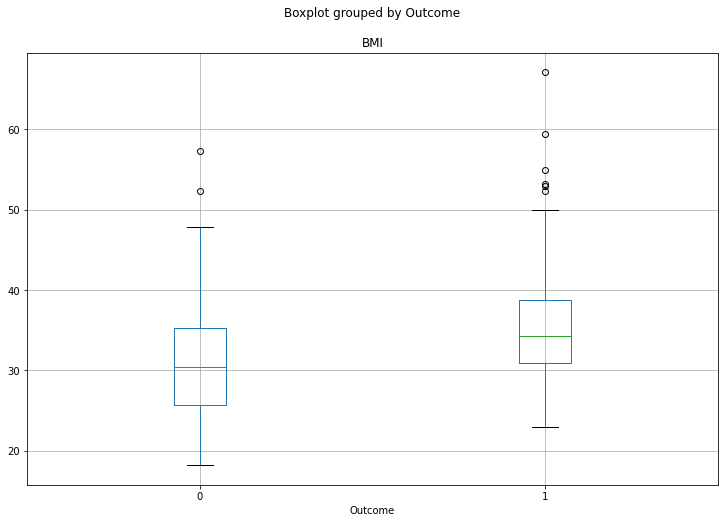

In [68]:
# Visualize boxplots
df.boxplot('BMI', by='Outcome', figsize=(12, 8))

<AxesSubplot:title={'center':'Glucose'}, xlabel='Outcome'>

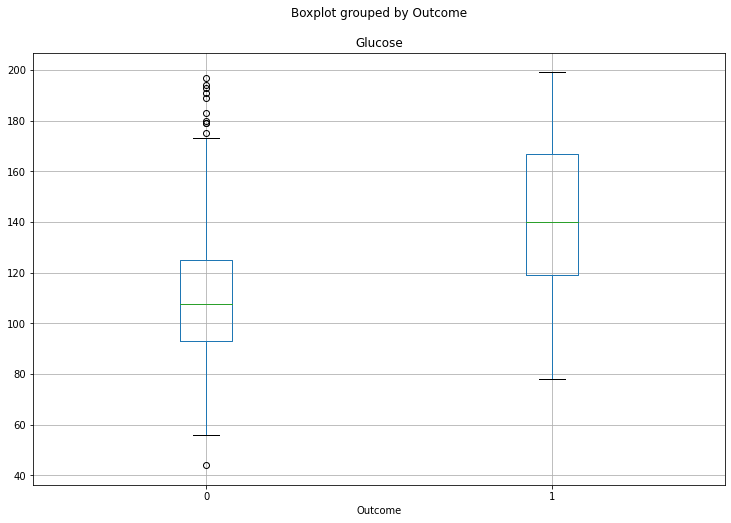

In [69]:
df.boxplot('Glucose', by='Outcome', figsize=(12, 8))

<AxesSubplot:title={'center':'BloodPressure'}, xlabel='Outcome'>

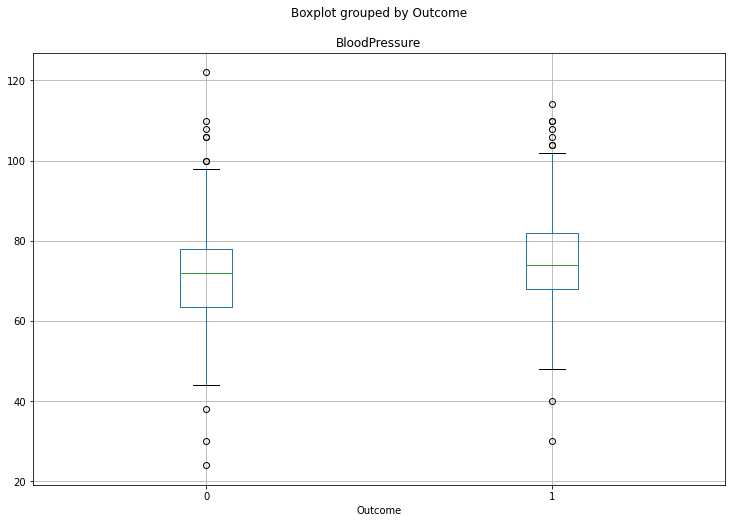

In [70]:
df.boxplot('BloodPressure', by='Outcome', figsize=(12, 8))

<AxesSubplot:title={'center':'Pregnancies'}, xlabel='Outcome'>

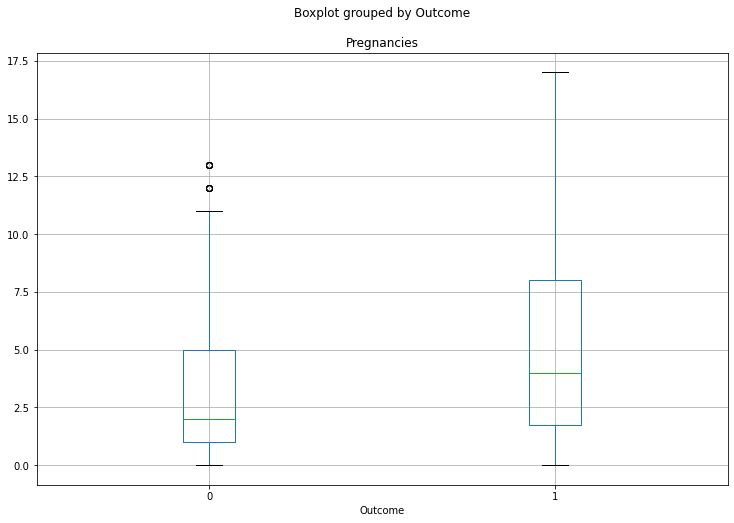

In [71]:
df.boxplot('Pregnancies', by='Outcome', figsize=(12, 8))

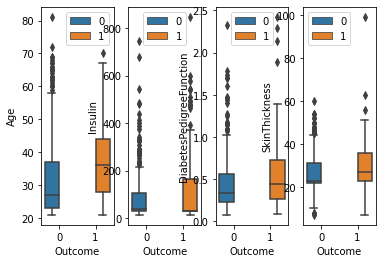

In [72]:
# Use seaborn to visualize remaining boxplots
fig, axs = plt.subplots(ncols=4)
sns.boxplot(data=df, x="Outcome", y="Age", hue=df.Outcome.tolist(), ax=axs[0])
sns.boxplot(data=df, x="Outcome", y="Insulin", hue=df.Outcome.tolist(), ax=axs[1])
sns.boxplot(data=df, x="Outcome", y="DiabetesPedigreeFunction", hue=df.Outcome.tolist(), ax=axs[2])
sns.boxplot(data=df, x="Outcome", y="SkinThickness", hue=df.Outcome.tolist(), ax=axs[3])
plt.show()

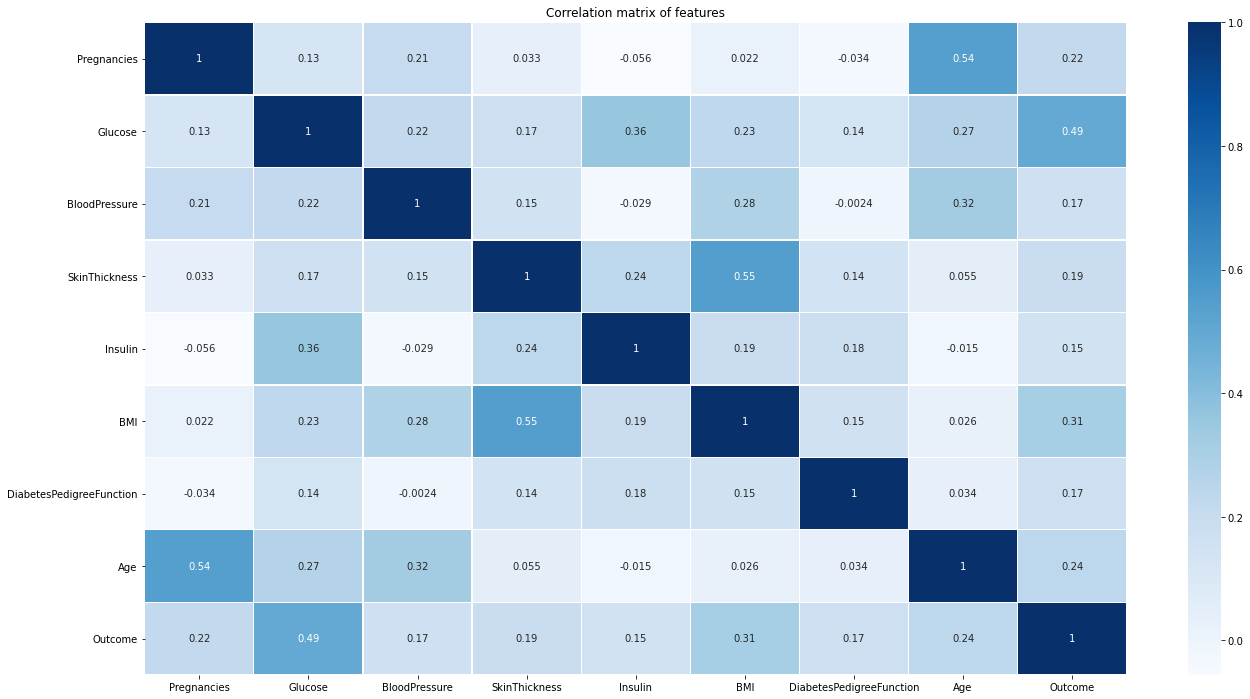

In [73]:
#Visualize correlation on heatmap
corr = df.corr()
fig, ax = plt.subplots(figsize=(22,12))
sns.heatmap(corr,annot=True, cmap = 'Blues',linewidth = 0.30)
plt.title('Correlation matrix of features')
plt.show()

In [74]:
# Conduct t-test on the target variables 
import scipy
from scipy import stats

In [75]:
tStat, pValue = stats.ttest_ind(df[['Glucose', 'SkinThickness']], df['BMI'], equal_var = False) #run T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic
# sigficant -> the change of glucose and skinthickness will influence the change of BMI

P-Value:[0.00000000e+00 3.29746372e-33] T-Statistic:[ 79.22194687 -12.3201555 ]


In [76]:
# wrangle continuous columns into categorical ones
# create a list of our conditions
conditions = [(df['Glucose'] >= 44) & (df['Glucose'] <= 140),
    (df['Glucose'] > 140) & (df['Glucose'] <= 199)
    ]
# 140 cited from
#https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451#:~:text=A%20blood%20sugar%20level%20less,mmol%2FL)%20indicates%20prediabetes.

# create a list of the values we want to assign for each condition
values = ['Low', 'High']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Glucose_Group'] = np.select(conditions, values)

# display updated DataFrame
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   
2            8      183             64             23     30.5  23.3   
3            1       89             66             23     94.0  28.1   
4            0      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome Glucose_Group  
0                     0.627   50        1          High  
1                     0.351   31        0           Low  
2                     0.672   32        1          High  
3                     0.167   21        0           Low  
4                     2.288   33        1           Low

In [77]:
# create a list of our conditions
conditions1 = [(df['SkinThickness'] >= 7) & (df['SkinThickness'] <= 23),
    (df['SkinThickness'] > 23) & (df['SkinThickness'] <= 99)
    ]

# 23 cited from
# https://medical-dictionary.thefreedictionary.com/triceps+skin-fold+thickness#:~:text=A%20value%20used%20to%20estimate,%3B%20in%20females%2C%2023%20mm.

# create a list of the values we want to assign for each condition
values1 = ['Thin', 'Thick']

# create a new column and use np.select to assign values to it using our lists as arguments
df['SkinThickness_Group'] = np.select(conditions1, values1)

# display updated DataFrame
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   
2            8      183             64             23     30.5  23.3   
3            1       89             66             23     94.0  28.1   
4            0      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome Glucose_Group SkinThickness_Group  
0                     0.627   50        1          High               Thick  
1                     0.351   31        0           Low               Thick  
2                     0.672   32        1          High                Thin  
3                     0.167   21        0           Low                Thin  
4                     2.288   33        1           Low               Thick

In [78]:
# Statistical models
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [79]:
#ANOVA
#doing the 2 way anova with statsmodels
model = ols('BMI ~ C(Glucose_Group) + C(SkinThickness_Group) + C(Glucose_Group):C(SkinThickness_Group)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq     df           F  \
C(Glucose_Group)                           952.291954    1.0   25.162130   
C(SkinThickness_Group)                    5681.900471    1.0  150.131181   
C(Glucose_Group):C(SkinThickness_Group)     90.527360    1.0    2.391978   
Residual                                 28914.526179  764.0         NaN   

                                               PR(>F)  
C(Glucose_Group)                         6.559125e-07  
C(SkinThickness_Group)                   1.219238e-31  
C(Glucose_Group):C(SkinThickness_Group)  1.223734e-01  
Residual                                          NaN

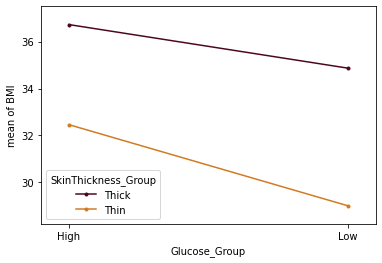

In [80]:
from statsmodels.graphics.factorplots import interaction_plot
#interaction plot
fig = interaction_plot(x=df['Glucose_Group'], trace=df['SkinThickness_Group'], response=df['BMI'], 
    colors=['#4c061d','#d17a22'])
plt.show()

In [40]:
pip install bioinfokit

     |████████████████████████████████| 84 kB 1.8 MB/s eta 0:00:01
  Created wheel for bioinfokit: filename=bioinfokit-2.0.8-py3-none-any.whl size=56748 sha256=0138e8b853295c622eee4899f4b6dba9f40fc893cb3d3edf585710905edbf920
  Stored in directory: /Users/zhangyingyue/Library/Caches/pip/wheels/40/b8/82/23dd1b441e2c834181d4c595cff79f091212eb2c482e0550e2
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7098 sha256=78f83a695ec2c8baae468d7a872b1ab20f1730c1d64a3dd198ebb71c2ed5c2a4
  Stored in directory: /Users/zhangyingyue/Library/Caches/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.6-py3-none-any.whl size=32062 sha256=e1d39a4cc4e0f61ad21a2707ab88b4e7754a4c778b2202a386051a1955c36fa9
  Stored in directory: /Users/zhangyingyue/Library/Caches/pip/wheels/82/e4/64/dd790d424818bc2f59c11471a1eee5dc8cfcd3f8ee8c4812fa
Successfully built bioinfokit adjustText matplotlib-venn
Note:

In [81]:
from bioinfokit.analys import stat
#post hoc test for main effect Glucose_Group
res = stat()
res.tukey_hsd(df=df, res_var='BMI', xfac_var='Glucose_Group', anova_model='BMI~C(Glucose_Group)+C(SkinThickness_Group)+C(Glucose_Group):C(SkinThickness_Group)')
res.tukey_summary

group1 group2      Diff     Lower     Upper  q-value  p-value
0   High    Low  3.301563  2.295171  4.307954  9.10761    0.001

In [82]:
#post hoc test for main effect SkinThickness_Group
res.tukey_hsd(df=df, res_var='BMI', xfac_var='SkinThickness_Group', anova_model='BMI~C(Glucose_Group)+C(SkinThickness_Group)+C(Glucose_Group):C(SkinThickness_Group)')
res.tukey_summary

group1 group2      Diff    Lower     Upper    q-value  p-value
0  Thick   Thin  5.732255  4.86003  6.604481  18.245182    0.001

In [83]:
#post hoc test for interaction effect between Glucose_Group and SkinThickness_Group
res.tukey_hsd(df=df, res_var='BMI', xfac_var=['Glucose_Group','SkinThickness_Group'], anova_model='BMI~C(Glucose_Group)+C(SkinThickness_Group)+C(Glucose_Group):C(SkinThickness_Group)')
res.tukey_summary.head(10)

group1        group2      Diff     Lower     Upper    q-value  \
0  (High, Thick)  (High, Thin)  4.272940  1.958268  6.587611   6.721772   
1  (High, Thick)  (Low, Thick)  1.860350  0.062371  3.658329   3.767527   
2  (High, Thick)   (Low, Thin)  7.736019  5.989809  9.482229  16.131233   
3   (High, Thin)  (Low, Thick)  2.412590  0.395198  4.429982   4.354513   
4   (High, Thin)   (Low, Thin)  3.463079  1.491687  5.434472   6.396401   
5   (Low, Thick)   (Low, Thin)  5.875669  4.548487  7.202852  16.120301   

    p-value  
0  0.001000  
1  0.039353  
2  0.001000  
3  0.011533  
4  0.001000  
5  0.001000

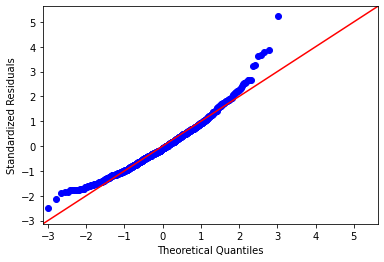

In [84]:
#testing for normality
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

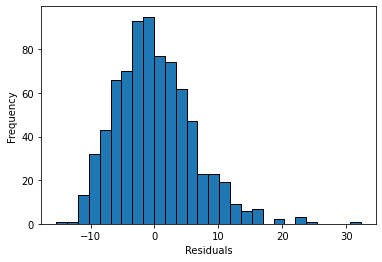

In [85]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [86]:
# test if a continuous variable follows a normal distribution
w, pvalue = stats.shapiro(model.resid) 
print(w, pvalue)

0.9692890048027039 1.2706944003959553e-11


In [87]:
#levene's test for constancy of variance
res = stat()
res.levene(df=df, res_var='BMI', xfac_var=['Glucose_Group', 'SkinThickness_Group'])
res.levene_summary

Parameter   Value
0      Test statistics (W)  0.6867
1  Degrees of freedom (Df)  3.0000
2                  p value  0.5603

In [88]:
# Multiple Linear Rgression
X = df[['Glucose', 'SkinThickness']]
y = df['BMI']

In [89]:
# split training data and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% training set and 20% test set

In [90]:
# train the algorithm 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [91]:
# to show the coefficients
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
Glucose           0.039595
SkinThickness     0.395386

In [92]:
# make predictions
y_pred = regressor.predict(X_test)

In [93]:
# To compare the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual  Predicted
661    42.9  41.837601
122    33.6  33.054887
113    34.0  29.059755
14     25.8  31.041719
529    24.6  30.445563
..      ...        ...
476    33.7  38.906486
482    27.8  29.020720
230    44.0  31.672994
527    26.3  27.480449
380    30.8  33.054887

[154 rows x 2 columns]

In [94]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.404051276876199
Mean Squared Error: 31.049765672460765
Root Mean Squared Error: 5.572231659977963


In [97]:
print('R-squared:', metrics.r2_score(y_test, y_pred))

R-squared: 0.22552878855366187
